In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df_al=pd.read_excel("Data Expt 3 aluminum6061.xls")
df_steel=pd.read_excel("Data Expt 3 steel1045.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [6]:
df_al

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195,761,196,146.741,0.66782,8182.946777,3.007105,17.382132,NaN,NaN,NaN
196,761,197,146.938,0.67016,8123.916016,3.007105,17.502197,NaN,NaN,NaN
197,761,198,147.141,0.67172,8074.892090,3.007105,17.502197,NaN,NaN,NaN
198,761,199,147.339,0.67326,8019.407227,3.007105,17.622837,NaN,NaN,NaN


In [7]:
df_steel

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
210,762,211,160.565,0.73436,20862.660156,3.013513,17.186405,NaN,NaN,NaN
211,762,212,160.964,0.73750,20716.890625,3.013513,17.300003,NaN,NaN,NaN
212,762,213,161.369,0.74056,20557.337891,3.013513,17.546461,NaN,NaN,NaN
213,762,214,161.657,0.74288,20433.939453,3.013513,17.671289,NaN,NaN,NaN


In [8]:
d = 0.506
r = d/2
A = np.pi*r**2


In [9]:
stress_al = (df_al['FORCE']/A)*0.001
strain_al = df_al['CH5']*0.01
stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = df_steel['CH5']*0.01

**Plot the full stress strain curve**

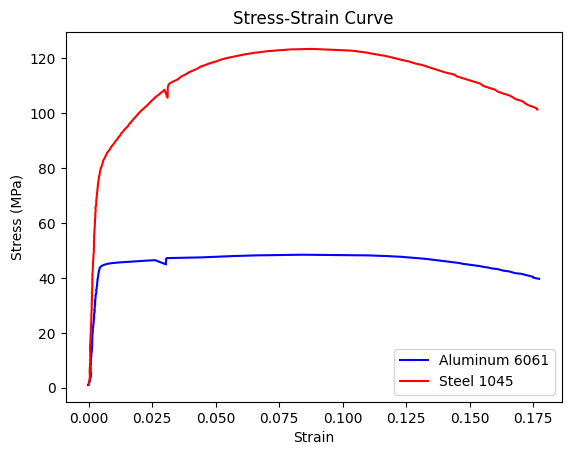

In [10]:
plt.plot(strain_al, stress_al, label='Aluminum 6061', color='blue')

# Plotting the stress-strain curve for steel
plt.plot(strain_steel, stress_steel, label='Steel 1045', color='red')

# Adding labels and title
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Stress-Strain Curve')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()

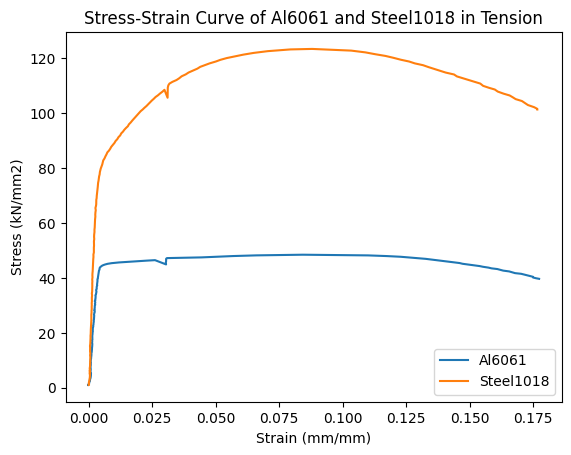

In [11]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (kN/mm2)')

ax.set_title('Stress-Strain Curve of Al6061 and Steel1018 in Tension')

ax.legend(['Al6061','Steel1018'])

**Calculate tensile strength**

In [12]:
# Calculate the tensile strength
ts_al = np.max(stress_al)
ts_steel = np.max(stress_steel)
final_ts_steel=6.8976*ts_steel
print(f'The tensile strength of Steel1018 in KN/mm2: {round(final_ts_steel,1)} KN/mm2')
final_ts_steel=6.8976*ts_al
print(f'The tensile strength of Al6061 in KN/mm2: {round(final_ts_steel,1)} KN/mm2')


The tensile strength of Steel1018 in KN/mm2: 851.7 KN/mm2
The tensile strength of Al6061 in KN/mm2: 334.3 KN/mm2


**Caclulate elastic modulus**

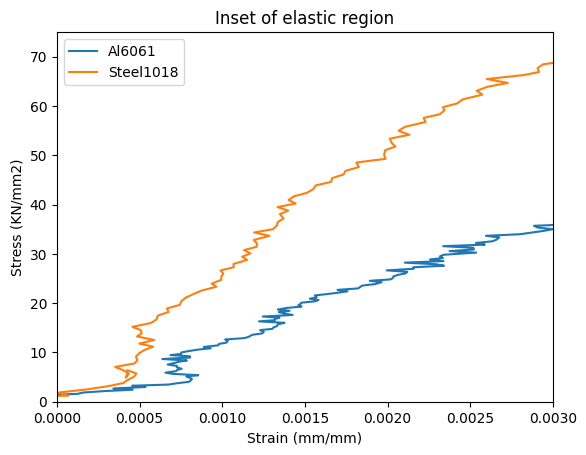

In [13]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_title('Inset of elastic region')
ax.set_xlabel('Strain (mm/mm)')
ax.set_ylabel('Stress (KN/mm2)')
ax.legend(['Al6061','Steel1018'])
ax.set_xlim([0,0.003])
ax.set_ylim([0,75])
plt.show()


In [14]:
# Find the elastic modulus of Al6061
# use stress and strain values from stress=0 to stress=35 N/mm2
linear_stress_al_mask = stress_al < 35
linear_stress_al = stress_al[linear_stress_al_mask]
linear_strain_al = strain_al[linear_stress_al_mask]
from scipy.stats import linregress
linear_regression_output = linregress(linear_strain_al, linear_stress_al)
E_al = linear_regression_output[0]
final_E_al=6.8976*E_al
print(f'The elastic modulus of Al6061 is {round(final_E_al,1)} KN/mm2')


The elastic modulus of Al6061 is 89631.5 KN/mm2


In [15]:
# Find the elastic modulus of Steel1018
# use stress and strain values from stress=0 to stress=55 N/mm2
linear_stress_steel_mask = stress_steel < 55
linear_stress_steel = stress_steel[linear_stress_steel_mask]
linear_strain_steel = strain_steel[linear_stress_steel_mask]
linear_regression_output_steel = linregress(linear_strain_steel, linear_stress_steel)
E_steel = linear_regression_output_steel[0]
final_E_steel=6.8976*E_steel
print(f'The elastic modulus of Steel1018 is {round(final_E_steel,1)} KN/mm2')


The elastic modulus of Steel1018 is 192235.2 KN/mm2


#Calculate ductility

In [16]:
# Find the ductility for Al6061
stress_al_array = np.array(stress_al)
stress_al_last = stress_al_array[-1]
strain_al_array = np.array(strain_al)
strain_al_last = strain_al_array[-1]
EL_al = -stress_al_last/final_E_al + strain_al_last
print(f'The ductility of Al6061 is {round(EL_al*100,1)}%')

The ductility of Al6061 is 17.7%


In [17]:
# Find the ductility of Steel1018
stress_steel_array = np.array(stress_steel)
stress_steel_last = stress_steel_array[-1]
strain_steel_array = np.array(strain_steel)
strain_steel_last = strain_steel_array[-1]
EL_steel = -stress_steel_last/final_E_steel + strain_steel_last
print(f'The ductility of Steel1018 is {round(EL_steel*100,1)}%')

The ductility of Steel1018 is 17.6%
